In [6]:
%matplotlib inline 
import sys
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from matplotlib import animation as ani
import sklearn.metrics as mt
plt.style.use('ggplot')

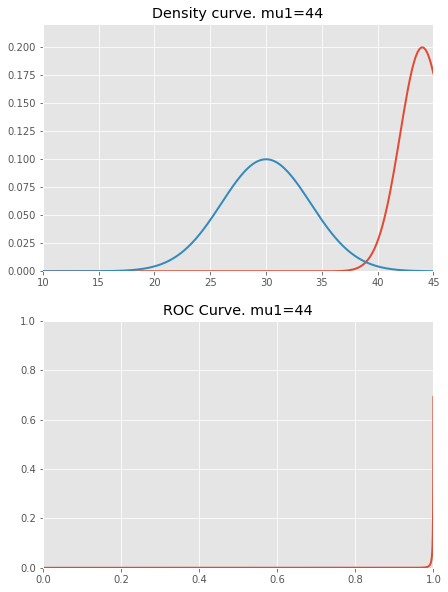

In [9]:
def animate(nframe):
    global num_frame
    plt.clf()
    xmin = 10
    xmax = 45

    # xの分割数
    sx = 200 

    # 現在位置
    pos = nframe

    # x軸生成
    xx = np.linspace(xmin, xmax, sx)

    mu1 = 10 + pos
    mu2 = 30
    
    sd1 = 2
    sd2 = 4
    
    # 分布の準備
    x1 = st.norm.pdf(xx, loc=mu1, scale=sd1)
    x2 = st.norm.pdf(xx, loc=mu2, scale=sd2)
    cx1 = st.norm.cdf(xx, loc=mu1, scale=sd1)
    cx2 = st.norm.cdf(xx, loc=mu2, scale=sd2)

    # Graph描画
    plt.subplot(211)
    plt.title("Density curve. mu1=%d"%mu1)
    plt.xlim(xmin, xmax)
    plt.ylim(0,0.22)
    ln1, = plt.plot([], [], linewidth=2, zorder = 200, animated=True)
    ln1.set_data(xx, x1)
    ln2, = plt.plot([], [], linewidth=2, zorder = 200, animated=True)
    ln2.set_data(xx, x2)
    
    # plt.plot(xx,x1,linewidth=2, zorder = 200)
    # plt.plot(xx,x2,linewidth=2, zorder = 200)

    plt.subplot(212)
    plt.title("ROC Curve. mu1=%d"%(mu1))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.plot(cx2,cx1, linewidth=2)
    
    return ln1, ln2

num_frame = 35
fig = plt.figure(figsize=(7,10))
anim = ani.FuncAnimation(fig, animate, frames=num_frame, blit=True)
anim.save('ROC_curve2.gif', writer='imagemagick', fps=2, dpi=64)